In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Least-Squares Linear Regression

- fit slope and intercept so that the linear regression fit (here: "line") minimizes the sum of the residuals (vertical offsets or distances)

<img src="images/linear_regression_scheme.png" width="450" />

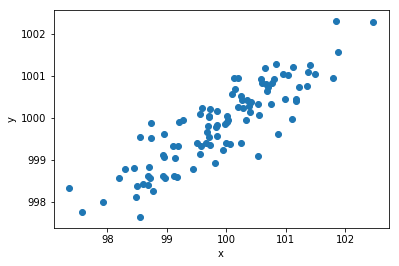

In [2]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- Pearson correlation coefficient (see the [Covariance and Correlation](cov-corr.ipynb) notebook for details)

In [3]:
np.corrcoef(np.vstack([x, y]))

array([[ 1.        ,  0.87552229],
       [ 0.87552229,  1.        ]])

### 1. Least-squares linear regression via "classic statistic"

- using "classic statistics":

$w_1 = \frac{\sigma_{x,y}}{\sigma_{x}^{2}}$

$b = \bar{y} - w_1\bar{x}$

where 


$\text{covariance: } \sigma_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$

$\text{variance: } \sigma^{2}_{x} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [4]:
cov_xy = np.cov(np.vstack((x, y)), ddof=0)[0, 1]
var_x = np.var(x, ddof=0)
w1 = cov_xy / var_x
b = np.mean(y) - w1*np.mean(x)

print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


### 2. Least-squares linear regression via linear algebra

- closed-form (analytical) solution:

$$w = (X^T X)^{-1} X^T y$$

In [5]:
X = x[:, np.newaxis]

# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


### 3. Using a pre-implemented function

In [6]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


- note that there are many alternative tools (scikit-learn, statsmodels, ...)

### Show line fit

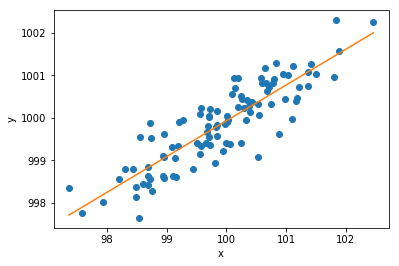

In [7]:
extremes = np.array([np.min(x), np.max(x)])
predict = extremes*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Evaluate

#### Mean squared error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

- note that MSE is scale-dependent

In [8]:
y_predicted = x*w1 + b
mse = np.mean((y - y_predicted)**2)
mse

0.21920128791624113

In [9]:
rmse = np.sqrt(mse)
rmse

0.46818937185314358

#### Residuals

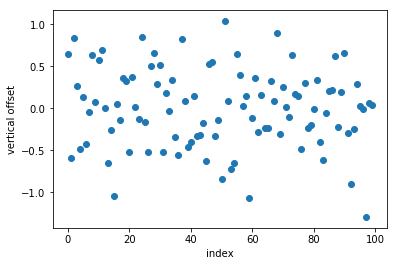

In [10]:
plt.scatter(np.arange(x.shape[0]), y - y_predicted)
plt.ylabel('vertical offset')
plt.xlabel('index')

#### Coefficient of determination (R^2)

- Total sum of squares (variability of the reponse or target variable, proportional to variance):

$$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$

- Residual sum of squares:

$$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y_i} - \bar{y_i} \big)^2$$

- Coefficient of determination

$$R^2 = \frac{SS_{residual}}{SS_{total}}$$

In [11]:
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((y_predicted - mean_y)**2)
r_squared = SS_residual / SS_total
r_squared

0.76653928492766576

- usually, the coefficient of determination can be computed by squaring the pearson correlation coefficient:

In [12]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_value**2

0.766539284927652

- note that if the model fits worse than a horizontal line, the coefficient of determination can be negative (so it is not necessarily always recommended to use a squared pearson coefficient to compute $R^2$)